In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json

In [85]:
data_path = "data.csv"
data = pd.read_csv(data_path)

# loop over rows in data 
for index, row in data.iterrows():
    print(row.keys())


Index(['workerid', 'proliferate.condition', 'trial1', 'trial10', 'trial11',
       'trial12', 'trial13', 'trial14', 'trial15', 'trial16', 'trial17',
       'trial18', 'trial19', 'trial2', 'trial20', 'trial21', 'trial22',
       'trial23', 'trial24', 'trial25', 'trial26', 'trial27', 'trial28',
       'trial29', 'trial3', 'trial30', 'trial31', 'trial32', 'trial33',
       'trial34', 'trial35', 'trial36', 'trial37', 'trial38', 'trial39',
       'trial4', 'trial40', 'trial5', 'trial6', 'trial7', 'trial8', 'trial9',
       'error'],
      dtype='object')
Index(['workerid', 'proliferate.condition', 'trial1', 'trial10', 'trial11',
       'trial12', 'trial13', 'trial14', 'trial15', 'trial16', 'trial17',
       'trial18', 'trial19', 'trial2', 'trial20', 'trial21', 'trial22',
       'trial23', 'trial24', 'trial25', 'trial26', 'trial27', 'trial28',
       'trial29', 'trial3', 'trial30', 'trial31', 'trial32', 'trial33',
       'trial34', 'trial35', 'trial36', 'trial37', 'trial38', 'trial39',
     

In [134]:
data_dict = {
    'rating': [],
    'scenario_id': [],
    'structure': [],
    'type': [],
    'strength': [],
    'subject_id': [],
    'target': [],
    'background': [],
}

for i, row in data.iterrows():

    print(len(row))
    # if i == 0:
       
    for trial in row[2:-1]:
        trial_data = eval(trial)
        data_dict['subject_id'].append(i)
        data_dict['rating'].append(trial_data['likertResponses']['likert1'])
        print(trial_data['scenario_id'])
        data_dict['scenario_id'].append(trial_data['scenario_id'])
        data_dict['structure'].append(trial_data['structure'])
        data_dict['type'].append(trial_data['type'])
        data_dict['strength'].append(trial_data['strength'])
        data_dict['target'].append(trial_data['target'])
        data_dict['background'].append(trial_data['background'])
        

    # data_dict['rating'].append(trial_data['likertResponses']['likert1'])
    # data_dict['scenario_id'].append(trial_data['scenario_id'])
    # data_dict['structure'].append(trial_data['structure'])
    # data_dict['type'].append(trial_data['type'])
    # data_dict['strength'].append(trial_data['strength'])



43
3
4
3
0
4
3
4
4
1
2
2
0
3
0
1
1
2
4
2
1
4
3
2
0
2
3
3
1
2
0
0
4
3
1
1
0
2
4
1
0
43
2
1
1
0
2
0
1
1
4
4
2
0
4
3
3
1
4
4
2
0
4
4
2
2
4
3
3
3
3
0
1
0
2
3
0
1
3
0
2
1
43
2
2
4
1
4
3
3
0
4
2
3
0
2
1
4
0
4
3
4
1
1
1
2
1
3
0
0
2
1
0
3
4
3
3
2
2
0
4
0
1
43
0
4
0
4
3
0
2
0
1
1
0
0
3
2
4
1
3
3
4
3
0
0
2
1
4
4
3
1
3
1
4
3
2
2
4
1
1
2
2
2
43
1
3
0
2
3
0
1
1
1
1
3
4
3
2
3
1
0
0
4
0
2
3
0
4
2
4
4
3
1
3
2
4
0
2
2
2
4
1
4
0


In [146]:

df = pd.DataFrame(data_dict)
print(df)

# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by the specified columns
grouped = df.groupby(['type', 'strength', 'scenario_id', 'structure'])
# remove harm

# grouped_2 = df.groupby(['type', 'strength'])

# # Calculate the mean and standard deviation for each group
aggregated = grouped['rating'].agg(['mean', 'std', 'count'])

# Calculate standard error of the mean (SEM)
aggregated['sem'] = aggregated['std'] / np.sqrt(aggregated['count'])

# Drop the now unnecessary std and count columns
aggregated = aggregated.drop(['std', 'count'], axis=1).reset_index()

aggregated["background"] = df.groupby(['type', 'strength', 'scenario_id', 'structure'])['background'].apply(list).reset_index()['background']
aggregated["target"] = df.groupby(['type', 'strength', 'scenario_id', 'structure'])['target'].apply(list).reset_index()['target']
aggregated = aggregated[aggregated["type"] != "harm"]
aggregated_mild = aggregated[aggregated["strength"] == "mild"]

aggregated_mild.to_csv("aggregated_good_mild.csv")


    rating  scenario_id structure  type strength  subject_id  \
0        6            3        cc  good     mild           0   
1        3            4        cc  harm   severe           0   
2        7            3       coc  good     mild           0   
3        3            0       coc  harm     mild           0   
4        2            4        cc  harm     mild           0   
..     ...          ...       ...   ...      ...         ...   
195      7            2        cc  good     mild           4   
196      2            4        cc  harm   severe           4   
197      4            1        cc  harm     mild           4   
198      7            4       coc  good   severe           4   
199      2            0       coc  harm   severe           4   

                                                target  \
0    The new scheduling system will improve the eff...   
1    This change requires the dismissal of several ...   
2    The digital system improves the accuracy and a...   

<BarContainer object of 4 artists>

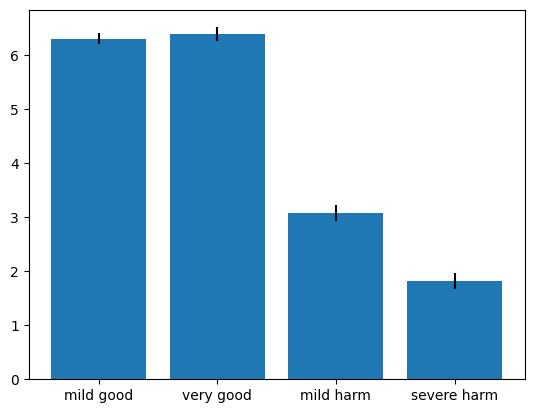

In [116]:
plt.bar(["mild good", "very good", "mild harm", "severe harm"], aggregated['mean'], yerr=aggregated['sem'])

In [55]:
[int(i) for i in list(df_mild_harm['rating'])]
[int(i) for i in list(df_severe_harm['rating'])]

[2,
 2,
 2,
 2,
 1,
 4,
 1,
 3,
 3,
 5,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 2,
 2,
 4,
 2,
 3,
 2,
 1,
 2,
 2,
 2]

In [40]:
from scipy.stats import ttest_ind, ttest_rel
ttest_rel([int(i) for i in list(df_mild_harm['rating'])], [int(i) for i in list(df_severe_harm['rating'])])

TtestResult(statistic=4.3088441102153565, pvalue=0.00017198022211953903, df=29)